<span style="font-size: 35px; color: Green;font-family: 'Times New Roman', Times, serif;">Data Understanding</span>.
<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Read CSV into a Pandas object</span>


In [374]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


data = pd.read_csv('data/coupons.csv')
data.shape

(12684, 26)

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<span style="font-size: 35px; color: Green;font-family: 'Times New Roman', Times, serif;">Investigate the dataset</span>.
<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Rename Columns</span> 

In [376]:
data.rename(columns={'passanger': 'passenger'})

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Check for Null/NaN rows</span>


In [377]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Check for duplicate rows</span>

In [378]:
data.loc[data.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Decide what to do about your missing data </span>
<ul style="font-size: 17px; color: black; font-family: 'Times New Roman', Times, serif; list-style-type: disc; padding-left: 0; margin-left: 25px;">
  <li>We will drop car column as it has 99% of empty values relative to the whole dataset</li>
  <li>We will drop all duplicated rows</li>
</ul>

In [379]:
# print(data["car"].value_counts().idxmax())

CarNAPerct = (data['car'].isnull().sum() / data.shape[0])*100 
print(f"Car null values are {CarNAPerct:.2f}% of the whole dataset. Huge chunk of null data, drop column")

BarNAPerct = (data['Bar'].isnull().sum() / data.shape[0])*100 
print(f"Bar null values are {BarNAPerct:.2f}% of the whole dataset.Manageable null data, drop rows")

CoffeeHouseNAPerct = (data['CoffeeHouse'].isnull().sum() / data.shape[0])*100 
print(f"Coffee House null values are {CoffeeHouseNAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

CarryAwayNAPerct = (data['CarryAway'].isnull().sum() / data.shape[0])*100 
print(f"CarryAway null values are {CarryAwayNAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

RestLT20NAPerct = (data['RestaurantLessThan20'].isnull().sum() / data.shape[0])*100 
print(f"Restaurant <20% null values are {RestLT20NAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

Rest20_50NAPerct = (data['Restaurant20To50'].isnull().sum() / data.shape[0])*100 
print(f"Restaurance 20-50% null values are {Rest20_50NAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

Car null values are 99.15% of the whole dataset. Huge chunk of null data, drop column
Bar null values are 0.84% of the whole dataset.Manageable null data, drop rows
Coffee House null values are 1.71% of the whole dataset. Manageable null data, drop rows
CarryAway null values are 1.19% of the whole dataset. Manageable null data, drop rows
Restaurant <20% null values are 1.02% of the whole dataset. Manageable null data, drop rows
Restaurance 20-50% null values are 1.49% of the whole dataset. Manageable null data, drop rows


In [380]:
data= data.drop(columns=['car'])  # Drop Car Column  
data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']) # Drop all rows that have empty values for Bar, CoffeeHouse, CarryAway,RestaurantLessThan20,Restaurant20To50
data.shape

(12079, 25)

In [381]:
data= data.drop_duplicates() # Drop Duplicates
data.loc[data.duplicated()]
data.shape

(12007, 25)

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">What proportion of the total observations chose to accept the coupon?</span>  

In [382]:
print(f"Proportion of total accepted coupons is {data["Y"].mean()}")

Proportion of total accepted coupons is 0.5684184225868244


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Use a bar plot to visualize the coupon column</span> 

In [383]:
coupon_cnts = data["coupon"].value_counts().reset_index()
coupon_cnts.columns = ["Coupon type", "Count of coupons"]  # Rename columns for clarity

# Plotting with Plotly Express
fig = px.bar(coupon_cnts, x="Coupon type", y="Count of coupons", title="Coupon Counts") 
fig.update_layout(width=500, height =500, title ="Coupon Column Visualization") 
fig.show() 

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Use a histogram to visualize the temperature column.</span> 

(array([   0., 2184.,    0.,    0.,    0.,    0., 3652.,    0.,    0.,
           0.,    0., 6171.,    0.]),
 array([25., 30., 35., 40., 45., 50., 55., 60., 65., 70., 75., 80., 85.,
        90.]),
 <BarContainer object of 13 artists>)

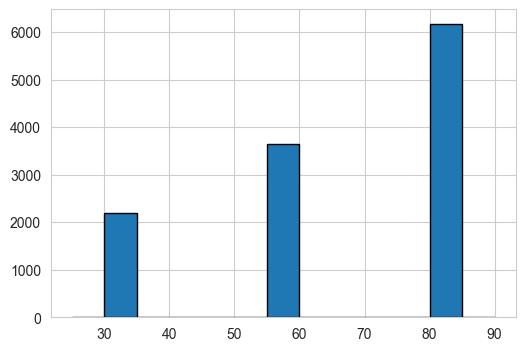

In [384]:
plt.figure(figsize=(6,4))
plt.hist(data["temperature"],bins = [25,30,35,40,45,50,55,60,65,70,75,80,85,90],edgecolor ='black')

<span style="font-size: 40px; color: green;font-family: 'Times New Roman', Times, serif;">Investigating the Bar Coupons</span>
<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">1.Create a new dataFrame that contains just the bar coupons.</span> 

In [385]:
df_BarCouponsOnly = data.query('coupon =="Bar"')
df_BarCouponsOnly

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">2.What proportion of bar coupons were accepted?</span> 

In [386]:
df_acceptedBarCoupons = data.query('coupon=="Bar" and Y==1')
print(f"Proportion of accepted bar coupons is {len(df_acceptedBarCoupons)/len(df_BarCouponsOnly)}")

Proportion of accepted bar coupons is 0.4118572927597062


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.</span>  


In [387]:
data["Bar"].value_counts()

Bar
never    4916
less1    3351
1~3      2365
4~8      1049
gt8       326
Name: count, dtype: int64

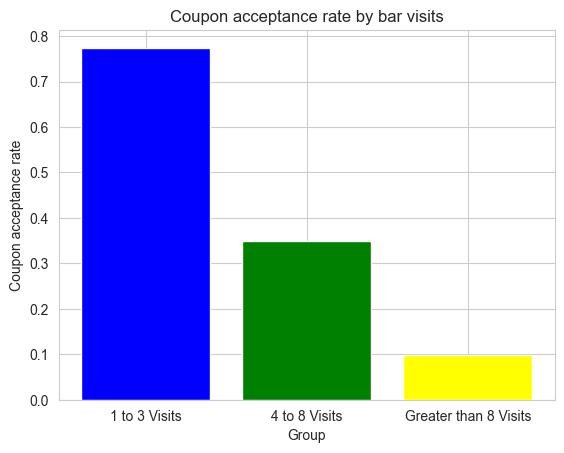

<Figure size 600x400 with 0 Axes>

In [388]:

df_Bar_1To3= data.query('Bar=="1~3" and Y==1 ')
df_Bar1To3AcceptanceRate= len(df_Bar_1To3)/len(df_BarCouponsOnly) 

df_4To8= data.query('Bar=="4~8" and Y==1 ')
df_Bar4To8AcceptanceRate= len(df_4To8)/len(df_BarCouponsOnly) 

df_gt8= data.query('Bar=="gt8" and Y==1 ')
df_Bargt8AcceptanceRate= len(df_gt8)/len(df_BarCouponsOnly) 

rates = [df_Bar1To3AcceptanceRate, df_Bar4To8AcceptanceRate, df_Bargt8AcceptanceRate]
group_labels = ['1 to 3 Visits', '4 to 8 Visits', 'Greater than 8 Visits']

plt.bar(group_labels, rates, color=['blue','green','yellow'] )
plt.title ('Coupon acceptance rate by bar visits')
plt.xlabel('Group')
plt.ylabel('Coupon acceptance rate')
plt.figure(figsize=(6,4))
plt.show()

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?</span>  


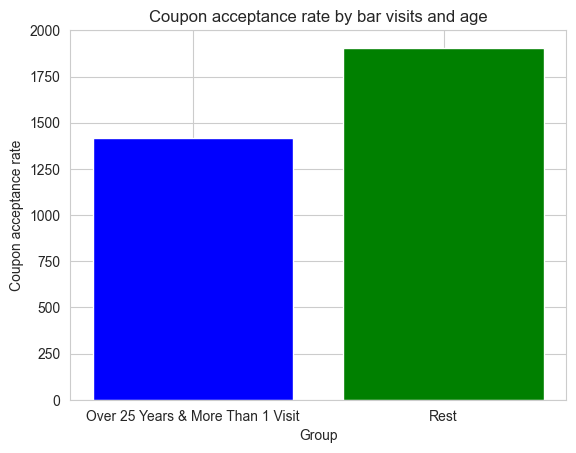

<Figure size 600x400 with 0 Axes>

In [389]:
#Convert Age to Numeric data type
data['age']=pd.to_numeric(data['age'],errors ='coerce').astype('Int64')

df_BarVisits_Age = data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (age > 25) and (Y==1)') 
group_labels =['Over 25 Years & More Than 1 Visit','Rest']
values = [df_BarVisits_Age.shape[0],df_BarCouponsOnly.shape[0]]
 
 

plt.bar(group_labels, values, color=['blue','green'] )
plt.title ('Coupon acceptance rate by bar visits and age')
plt.xlabel('Group')
plt.ylabel('Coupon acceptance rate')
plt.figure(figsize=(6,4))
plt.show()


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. </span>  


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">6. Compare the acceptance rates between those drivers who:</span>
<ul>
    <li><span style="font-size: 20px; color: red; font-family: 'Times New Roman', Times, serif;">go to bars more than once a month, had passengers that were not a kid, and were not widowed</span></li>
    <li><span style="font-size: 20px; color: red; font-family: 'Times New Roman', Times, serif;">go to bars more than once a month and are under the age of 30</span></li>
    <li><span style="font-size: 20px; color: red; font-family: 'Times New Roman', Times, serif;">go to cheap restaurants more than 4 times a month and income is less than 50K</span></li>
</ul>



<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons? </span>  

### Independent Investigation
Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  